<h1>Import libraries<h1>

In [1]:
from Model.Naive_Bayes_from_scratch import *
from Metrics.Classification_metrics import *
from Plots.Prediction_plots import *
Plots_predictions = Prediction_plots()

<h1>Explanation of Naive Bayes<h1>

Naive Bayes is an algorithm for classification problems. The formula for determining the probability is as follows:
$$P\left(Y=y_i\middle| X=\left(x_{1,i},x_{2,i},\ldots,\ x_{M,i}\right)\right)=\frac{P\left(Y=y_i\right)\times P\left(X=\left(x_1,x_2,\ldots,\ x_M\right)|Y=y_i\right)}{P\left(X=\left(x_1,x_2,\ldots,\ x_M\right)\right)}$$
$\text{Where: } y_i \text{ - the value of the explanatory variable for observation } i$<p>
$x_{m,i} \text{ - the value of the explanatory variable m for observation } i.$

$\text{So we just use Bayesian theory to estimate the probability.}$

$\text{Using the independence of the explanatory variables, it can be written that:}$
$$P\left(Y=y_i\middle| X=\left(x_{1,i},x_{2,i},\ldots,\ x_{M,i}\right)\right)=\frac{P\left(Y=y_i\right)\times\prod_{m=1}^{M}{P(X=x_m|Y=y_i)}}{\prod_{m=1}^{M}P\left(X=x_m\right)}$$
$\text{Where: } P\left(Y=y_i\right)\text{ - the probability of the same class as } y_i \text{ in our training set,}$<p>
$P\left(X=x_m|Y=y_i\right) \text{ - the probability of the selected value of the variable } x_m \text{ for the given class } (c=y_i).$<p>
$P\left(Y=x_m\right) \text{ - the probability of such a value for the explanatory variable } x_m.$

<h2>Estimating probabilities in Naive Bayes<h2>

$\text{For binary/categorical variables the solution is very simple, because:}$

$$Prior\ probabilities=P\left(Y=y_i\right)=\frac{occurrences\ of\ class\ c\ \left(y_i=c\right)}{number\ of\ samples}$$

$$Likelihood=P\left(X=x_m\middle| Y=y_i\right)=\frac{P\left(X=x_m,Y=y_i\right)}{P\left(Y=y_i\right)}=\frac{\frac{occurrences\ of\ given\ category\ for\ variable\ m\ within\ given\ class\ \left(y_i=c\right)}{number\ of\ samples}}{\frac{occurrences\ of\ class\ c\ \left(y_i=c\right)}{number\ of\ samples}}=\frac{occurrences\ of\ given\ category\ for\ variable\ m\ within\ given\ class\ \left(y_i=c\right)}{occurrences\ of\ class\ c\ \left(y_i=c\right)}$$

$\text{Due to the fact that sometimes a category is not present in our training set at all, we use the Laplace estimator, which adds a smoothing parameter } \alpha \text{:}$

$$P\left(X=x_m\middle| Y=y_i\right)=\frac{occurrences\ of\ given\ category\ for\ variable\ m\ within\ given\ class\ \left(y_i=c\right)+\alpha}{occurrences\ of\ class\ c\ \left(y_i=c\right)+\alpha\times M}$$

$\text{Where } M \text{ - number of features in the dataset.}$

$$Evidence=P\left(X=x_m\right)=\frac{occurrences\ of\ given\ category\ for\ variable\ m}{number\ of\ samples}$$

$\text{Actually for each class, the denominator (Evidence) is always the same, so it can be ignored when comparing probabilities.}$

$\text{For continuous variables, the problem is a bit more complicated.}$<p>
$\text{We are not able to determine it numerically (especially for small data sets), so we assume that the probability of observing the value of the variable } x_m \text{ for the given class } (c=y_i) \text{ is:}$

$$P\left(X=x_m\middle| Y=y_i\right)=f\left(X=x_m\middle| Y=y_i\right)=\frac{1}{\sqrt{2\times\pi\times\sigma_{m,c}^2}}\times e^{-\frac{1}{2}\times\left(\frac{x_m-\mu_{m,c}}{\sigma_{m,c}}\right)^2}$$

$\text{Where: } \mu_{m,c} \text{ - average of variable } x_m \text{inside class } c \text{ } (y_i=c),$<p>
$\sigma_{m,c} \text{ - standard deviation of the } x_m \text{ variable inside class } c \text{ } (y_i=c) \text{.}$<p>

$\text{On the other hand the Evidence will be calculated as follows: }$

$$P\left(X=x_m\right)=f\left(X=x_m\right)=\frac{1}{\sqrt{2\times\pi\times\sigma_m^2}}\times e^{-\frac{1}{2}\times\left(\frac{x_m-\mu_m}{\sigma_m}\right)^2}$$

$\text{Where: }\mu_m \text{ - mean of the variable } x_m,$<p>
$\sigma_m \text{- standard deviation of the variable }x_m.$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/bank-balanced.csv")
X = data.drop("deposit", axis=1)
y = data["deposit"]

In [5]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 11162


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h2>Check for null data<h2>

In [6]:
data.isnull().sum()/len(data)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<h3>Check dtypes of dataset<h3>

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

<h2>Divide our data into train and test sets<h2>

In [8]:
X = data.drop('deposit', axis=1)
y = data[['deposit']]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

$\text{Because of the assumption of a normal distribution of our continuous variables, it is worth modifying their distribution before modeling.}$<p>
$\text{For this purpose, the Z-score will be used, which is described by the following formula:}$

$${\hat{X}}_{m, i}=\frac{X_{m, i}-{\bar{X}}_m}{\sigma_m}$$

$\text{Where: } {\hat{X}}_{m, i} \text{ - standardized observation } i \text{ of variable } m,$<p>
$X_{m, i} \text{ - observation } i \text{ of variable } m,$<p>
${\bar{X}}_m \text{ - mean of variable } m,$<p>
$\sigma_m \text{ - standard deviation of variable } m.$

$\text{To properly approach the modeling process, the test set should remain unknown until the prediction is made.}$<p>
$\text{For this reason, we will only learn the mean and standard deviation for the training set and transform}$<p>
$\text{the two data sets based on just these values.}$ 

In [9]:
categorical_data_train = X_train.select_dtypes(include="object")
continous_data_train = X_train.select_dtypes(exclude="object")
categorical_data_test = X_test.select_dtypes(include="object")
continous_data_test = X_test.select_dtypes(exclude="object")
mean_train = np.mean(continous_data_train, axis=0)
std_train = np.std(continous_data_train, axis=0)
continous_data_train = (continous_data_train-mean_train)/std_train
continous_data_test = (continous_data_test-mean_train)/std_train

In [10]:
X_train_final = pd.concat([categorical_data_train, continous_data_train], axis=1)
X_test_final = pd.concat([categorical_data_test, continous_data_test], axis=1)

<h1>Evaluation and Visualization<h1>

$\text{To verify how well our algorithm is able to perform, a cross-validation will be used on the training set (in order to average the results obtained).}$<p>
$\text{Then we will check whether the Naive Bayes algorithm will perform equally well (or even better) on the test data.}$

$\text{Simple Cross-Validation class}$

In [11]:
class Cross_Validation():
    def __init__(self, metric, algorithm_instance, cross_validation_instance):
        metrics = {"accuracy": [lambda y, y_pred: accuracy_score(y, y_pred), "preds"],
                    "roc_auc": [lambda y, y_pred: roc_auc_score(y, y_pred), "probs"],
                    "mse": [lambda y, y_pred: -mean_squared_error(y, y_pred), "preds"],
                    "rmse": [lambda y, y_pred: -mean_squared_error(y, y_pred)**0.5, "preds"],
                    "mae": [lambda y, y_pred: -mean_absolute_error(y, y_pred), "preds"]}
        if metric not in metrics:
            raise ValueError('Unsupported metric: {}'.format(metric))
        self.eval_metric = metrics[metric][0]
        self.metric_type = metrics[metric][1]
        self.algorithm = algorithm_instance
        self.cv = cross_validation_instance
    
    def fit(self, X, y, verbose=False):
        X = self.check_X(X=X)
        y = self.check_y(y=y)
        self.train_scores, self.valid_scores = [], []
        for iter, (train_idx, valid_idx) in enumerate(self.cv.split(X, y)):
            X_train, X_valid = X[train_idx, :], X[valid_idx, :]
            y_train, y_valid = y[train_idx], y[valid_idx]
            self.algorithm.fit(X_train, y_train)
            if(self.metric_type == "preds"):
                y_train_pred = self.algorithm.predict(X_train)
                y_valid_pred = self.algorithm.predict(X_valid)
            else:
                y_train_pred = self.algorithm.predict_proba(X_train)[:, 1]
                y_valid_pred = self.algorithm.predict_proba(X_valid)[:, 1]
            self.train_scores.append(self.eval_metric(y_train, y_train_pred))
            self.valid_scores.append(self.eval_metric(y_valid, y_valid_pred))
            if(verbose == True):
                print("Iter {}: train scores: {}; valid scores: {}".format(iter, np.round(self.eval_metric(y_train, y_train_pred), 5), np.round(self.eval_metric(y_valid, y_valid_pred), 5)))
        return np.mean(self.train_scores), np.mean(self.valid_scores)
    
    def check_X(self, X):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, np.ndarray) and not torch.is_tensor(X):
            raise TypeError('Wrong type of X. It should be dataframe, numpy array or torch tensor.')
        X = np.array(X)
        if(X.ndim == 1):
            X = X[None, :]
        return X
    
    def check_y(self, y):
        if not isinstance(y, pd.DataFrame) and not isinstance(y, pd.Series) and not isinstance(y, np.ndarray) and not torch.is_tensor(y):
            raise TypeError('Wrong type of y. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        y = np.array(y)
        if(y.ndim == 2):
            y = y.squeeze()
        return y

In [12]:
CV = Cross_Validation(metric="roc_auc", algorithm_instance=Naive_Bayes(alpha=1), cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train_final, y=y_train, verbose=True)
print("Mean of train scores: {}; Mean of valid scores: {}".format(np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Iter 0: train scores: 0.84936; valid scores: 0.83244
Iter 1: train scores: 0.85053; valid scores: 0.84596
Iter 2: train scores: 0.85246; valid scores: 0.87133
Iter 3: train scores: 0.84733; valid scores: 0.84398
Iter 4: train scores: 0.85254; valid scores: 0.84743
Mean of train scores: 0.85; Mean of valid scores: 0.848


$\text{Scores are pretty simmilar on train and valid sets in cross vvalidation which is a good sign.}$

$\text{Now let's check how Naive Bayes will perform on the test data set.}$

In [13]:
model = Naive_Bayes(alpha=1)
model.fit(X=X_train_final, y=y_train)
y_pred = model.predict(X=X_test_final)
y_prob = model.predict_proba(X=X_test_final)[:, 1]

<h3>Confussion matrix<h3>

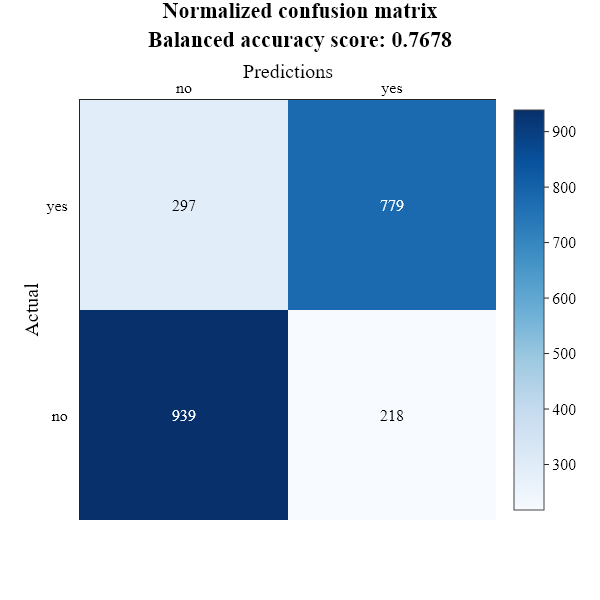

In [14]:
Plots_predictions.multilabel_conf_matrix(y_test, y_pred, labels=[i for i in np.unique(y_test)])

In [15]:
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob), 5)))
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Roc AUC score: 0.84234
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| no           |    0.759709 | 0.811582 |   0.784789 | 1157        |
| yes          |    0.781344 | 0.723978 |   0.751568 | 1076        |
| accuracy     |    0.769369 | 0.769369 |   0.769369 |    0.769369 |
| macro avg    |    0.770526 | 0.76778  |   0.768178 | 2233        |
| weighted avg |    0.770134 | 0.769369 |   0.768781 | 2233        |
+--------------+-------------+----------+------------+-------------+


<h3>ROC Curve<h3>

$\text{First we have to transform our y\_test data to contain only values {0, 1} (currently: {"no", "yes"})}$

In [21]:
encoder = OrdinalEncoder()
y_test_transformed = encoder.fit_transform(y_test)

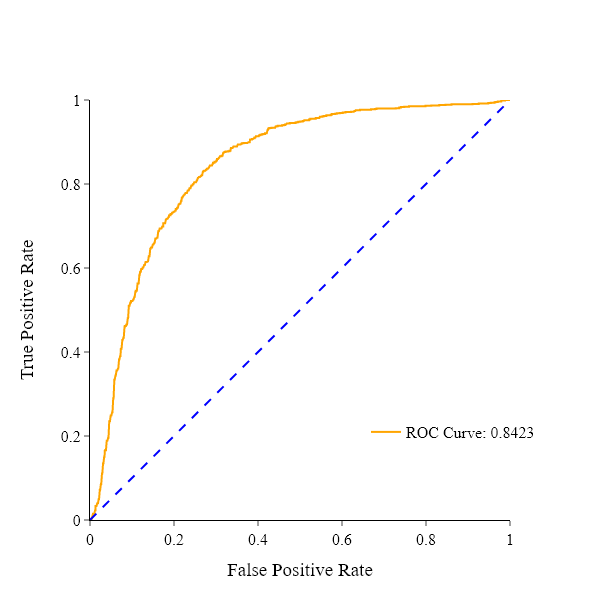

In [22]:
Plots_predictions.roc_auc_plot(y_true=y_test_transformed, y_prob=y_prob)

$\text{It seems that our Naive Bayes works really effectively on the test set as well.}$<p>
$\text{However, it's worth noting that Naive Bayes is just a simple algorithm, and Decision Trees or}$<p>
$\text{Support Vector Machines generally do much better (especially on slightly more challenging datasets).}$

<h1>Advantages and disadvantages of Naive Bayes<h1>

$\text{Advantages of Naive Bayes:}$<p>
$\text{- Short compilation time,}$<p>
$\text{- Generally performs better than other algorithms on a small number of training data and a large number of variables,}$<p>
$\text{- Performs relatively well on categorical variables relative to the other algorithms.}$<br>

$\text{Disadvantages of Naive Bayes:}$<p>
$\text{- Difficult to satisfy (for most data sets) the assumption of independence of variables,}$<p>
$\text{- Generally lower predictive power relative to other algorithms due to the simplicity of Naive Bayes.}$